In [1]:
import os
import sys
import math
import itertools
import numpy as np
import pickle
import matplotlib.pyplot as plt

from PIL import Image
from scipy.spatial.distance import cdist

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.utils import save_image, make_grid

from pathlib import Path
from torchsummary import summary

from enhancedsd.networks.esd import ESD_net
from data.datasets import CDataset
from enhancedsd.losses import pytorch_ssim

In [2]:
esd_model = ESD_net(channels=1,ICNR_initialization=True).cuda()

In [3]:
best_esd_weights = torch.load("../spatial_exps/Model_checkpoints/exp2/best_model_ep99.pth")
esd_model.load_state_dict(best_esd_weights)

<All keys matched successfully>

In [4]:
def get_data(batch_size=14):
    '''
    Data loader function
    
    + Modify DIR values in data/datasets.py to the file locations
    + Data needs to be in npy format
    + Dividing data into 3 sets is recommended (train, validation and test)
    
    '''
    train_loader = CDataset(mode='train', normalize=True)
    train_iterator = DataLoader(train_loader, batch_size=batch_size, pin_memory=True)

    val_loader = CDataset(mode='val') 
    val_iterator = DataLoader(val_loader, batch_size=batch_size, pin_memory=True)

    test_loader = CDataset(mode='test') 
    test_iterator = DataLoader(test_loader, batch_size=batch_size, pin_memory=True)
    print("Data loaded")
    return  train_iterator, val_iterator, test_iterator

BATCH_SIZE= 14
data_iter = get_data(batch_size=BATCH_SIZE) 

Data loaded


In [5]:
Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.Tensor
make_np = lambda x : torch.squeeze(x.detach().cpu()).numpy()

esd_model.eval()
with torch.no_grad():
    imgs = next(iter(data_iter[0]))
    imgs_lr = Variable(imgs["lr"].type(Tensor))
    imgs_hr = Variable(imgs["hr"].type(Tensor))           
    gen_hr = esd_model(imgs_lr)

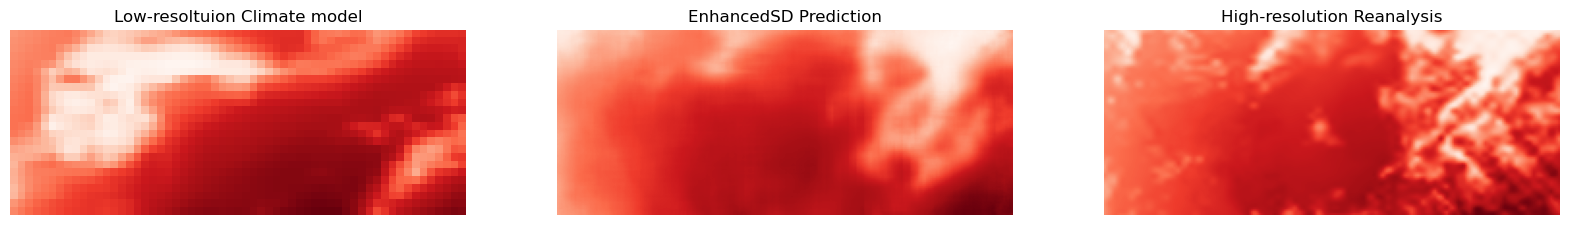

In [6]:
idx = 1
cp = 'Reds'
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(make_np(imgs_lr[idx]), cmap=cp)
plt.axis('off')
plt.title("Low-resoltuion Climate model")

plt.subplot(1,3,2)
plt.imshow(make_np(gen_hr[idx]), cmap=cp)
plt.axis('off')
plt.title("EnhancedSD Prediction")


plt.subplot(1,3,3)
plt.imshow(make_np(imgs_hr[idx]), cmap=cp)
plt.axis('off')
plt.title("High-resolution Reanalysis")
plt.show()